https://morvanzhou.github.io/tutorials/machine-learning/torch/3-04-save-reload/

# 要点

训练好了一个模型，我们当然想要保存它，留到下次要用的时候直接提取直接用，这就是我们这节要讲的内容。我们用回归的神经网络举例实现保存提取。

# 保存

我们快速地建造数据，搭建网络：

In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
#torch.manual_seed(1) #reproducible 可再生的

#构建数据
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #x data (tensor),shape=(100,1)
y = x.pow(2)+0.2*torch.rand(x.size()) # noise y data (tensor),shape=(100,1)

def save():
    #建立网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    #训练
    for t in range(100):
        prediction=net1(x)
        loss = loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
     # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    #接下来我们呢有两种途径来保存
    torch.save(net1,'net.pkl') #保存整个网络
    torch.save(net1.state_dict(),'net_params.pkl') #只保存网络中的参数（速度快，内存占用少）

# 提取网络

这种方式将会提取整个神经网络, 网络大的时候可能会比较慢.

In [3]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
 # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

# 只提取网络参数 

这种方式将会提取所有的参数, 然后再放到你的新建网络中

In [4]:
def restore_params():
    # 新建 net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
      # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

# 显示结果

调用上面建立的几个功能, 然后出图.

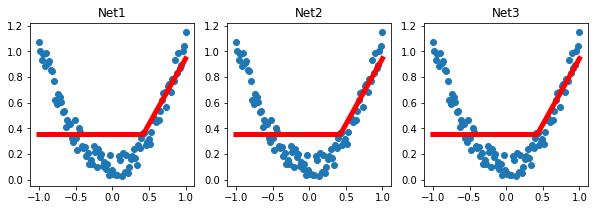

In [5]:
# 保存 net1 (1. 整个网络, 2. 只有参数)
save()

# 提取整个网络
restore_net()

# 提取网络参数, 复制到新网络
restore_params()

三个结果一样就说明是对的

## 完整程序

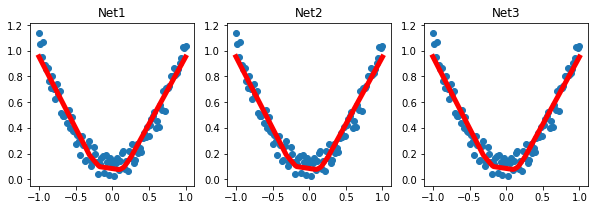

In [6]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net_back.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params_back.pkl')   # save only the parameters


def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net_back.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params_back.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()